# Desafio guiado s3: Máquinas de Soporte Vectorial

## Ejercicio 1: Preparar el ambiente de trabajo

In [1]:
# basicas
import pandas as pd
import numpy as np
# graficos
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)
#preproceso
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#modelo
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#indicadores
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [2]:
df= pd.read_csv('breast_cancer.csv')

In [3]:
df = df.drop(columns=['id', 'Unnamed: 32'])

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 31)

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Ejercicio 2: Visualizando la distribución de los atributos

In [10]:
parametros = df.columns.tolist()
parametros.remove('diagnosis')

In [11]:
parametros

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [12]:
columnas = 3
filas = int(np.round((len(parametros) / columnas),0))

In [13]:
filas

10

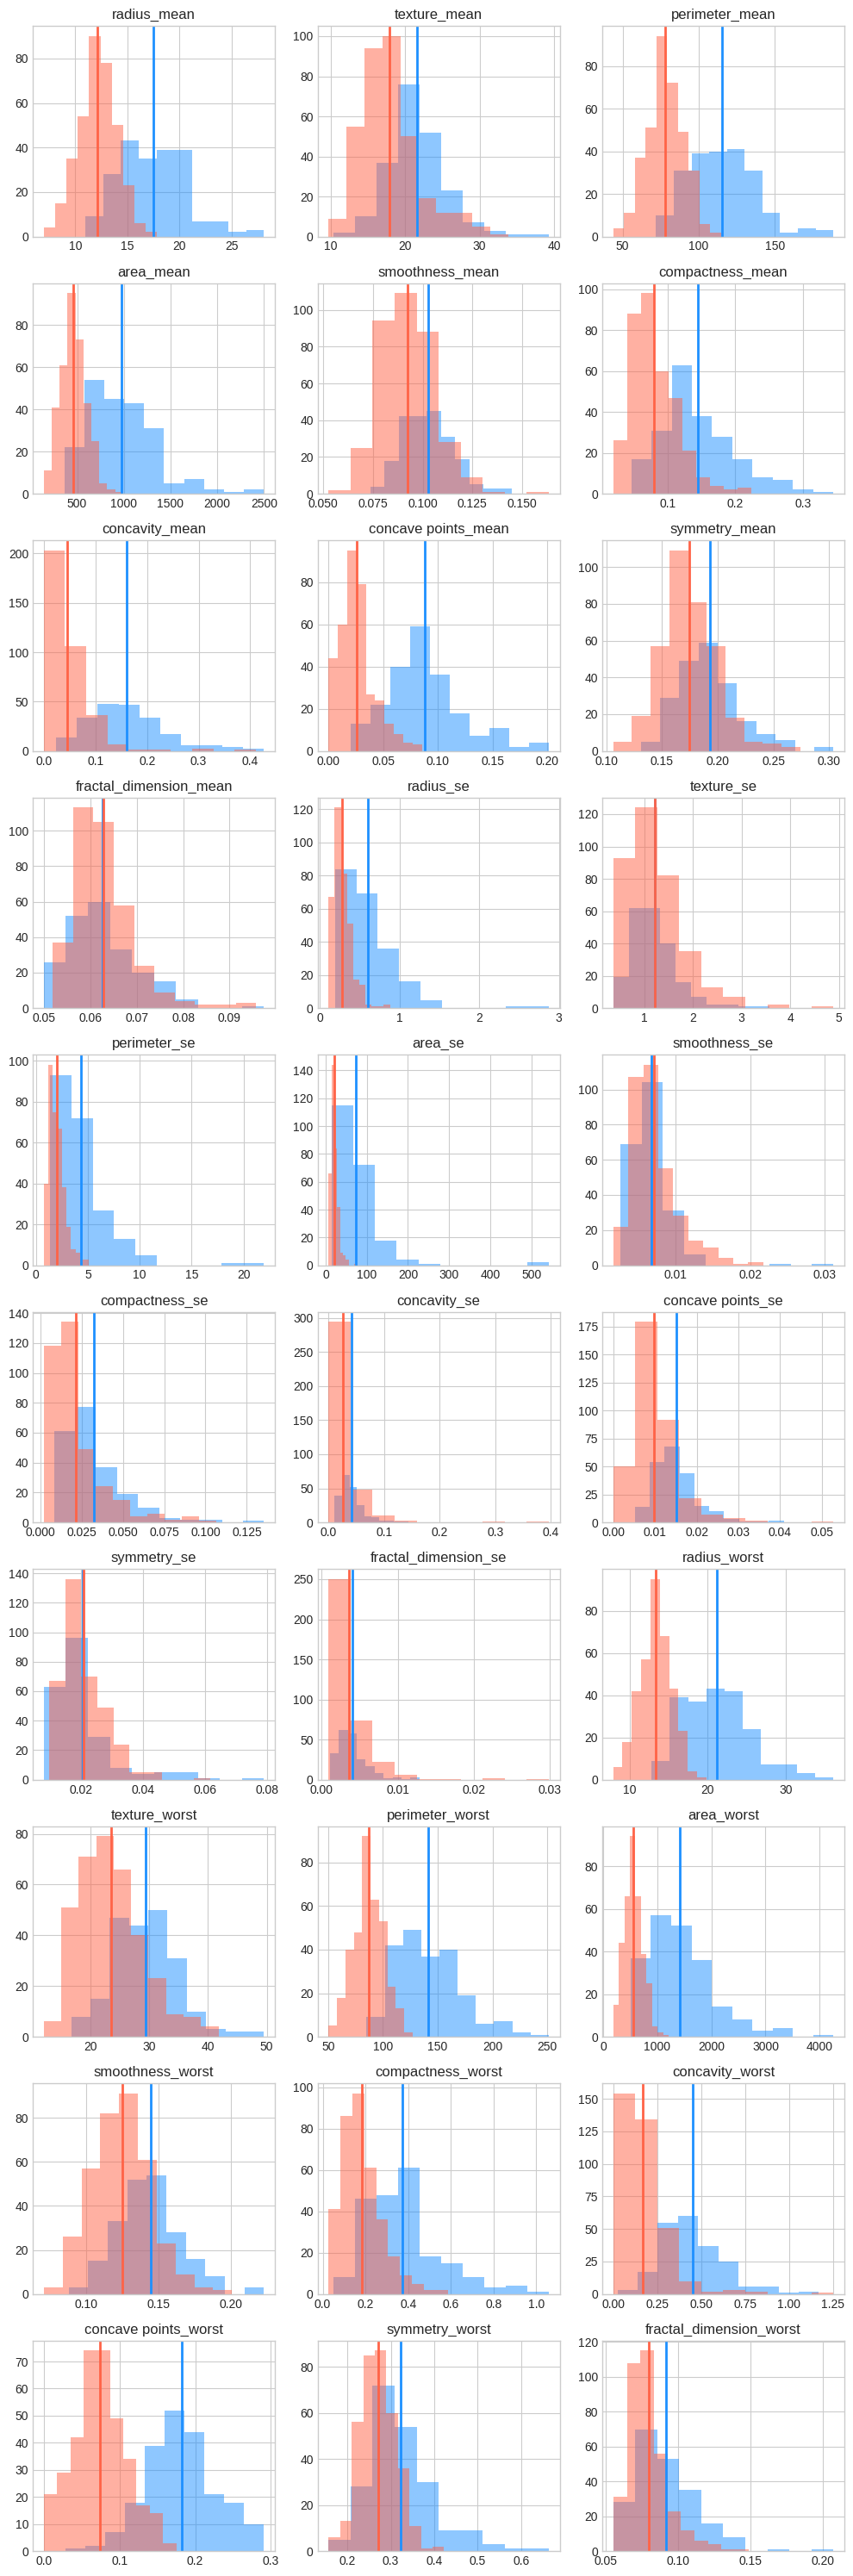

In [14]:
plt.figure(figsize=(10, 30))
columnas = 3
filas = int(np.round((len(parametros) / columnas),0))
percentiles = []
overlap = []
varname = []
pal = ['dodgerblue', 'tomato']
for index, colname in enumerate(parametros):
    plt.subplot(filas,columnas, index + 1)
    for n, i in enumerate(df['diagnosis'].unique()):
        tmp_select = df[df['diagnosis'] == i][colname]
        plt.hist(tmp_select, alpha=.5, color=pal[n])
        plt.axvline(np.mean(tmp_select), lw=2, color=pal[n])
        plt.title(colname)
    varname.append(colname)
    plt.title("{}".format(colname))
plt.tight_layout()

* Los atributos con mayor similitud en la distribucion, y por ende mas dificiles de separar son:
    - Texture_se
    - Fractal_dimension
    - Concavity_se
* por otro lado se notan varias variables separables en su concentracion, incluso que distribuyen de forma normal. Algunas son:
    - concave points_worst
    - radius_mean
    - Perimeter_mean

## Ejercicio 3: Estimando el porcentaje de overlap en los atributos

* La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde
mayores niveles indican una mayor comunalidad.
* Utilizando la función, generará un data frame donde almacenará el nombre del
atributo y su porcentaje. Ordene este data frame de forma descendente y preserve.

In [15]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison
            range=[empirical_lower_bound, empirical_upper_bound]
            )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"],tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),np.sum(tmp_hist_holder["h_0"]))
    return intersection

In [16]:
overlap = {}
for col in parametros:
    overlap[col] = np.round(histogram_overlap(df, col, 'diagnosis', perc=100),4)
data_overlap = pd.DataFrame.from_dict(overlap, orient='index', columns=['overlap'])
data_overlap = data_overlap.sort_values(by='overlap', ascending=False)
data_overlap

,overlap
fractal_dimension_se,0.5938
smoothness_se,0.5910
fractal_dimension_mean,0.5882
symmetry_se,0.5686
texture_se,0.5490
compactness_se,0.5238
smoothness_mean,0.5210
symmetry_mean,0.5098
concave points_se,0.5070
fractal_dimension_worst,0.4930


* Las 5 peores variables en cuanto a similitud son:

In [17]:
data_overlap.head(5)

,overlap
fractal_dimension_se,0.5938
smoothness_se,0.5910
fractal_dimension_mean,0.5882
symmetry_se,0.5686
texture_se,0.5490


* las 5 mejores variables (mas separadas) son:

In [18]:
data_overlap.tail(5)

,overlap
concave points_worst,0.1401
concave points_mean,0.1373
radius_worst,0.1345
perimeter_worst,0.1289
area_worst,0.1289


## Ejercicio 4: Selección del modelo por GridSearchCV

* Entrene una serie de modelosSVC con los siguienteshiper parámetros:
    - C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000].
    - gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].
    - Validaciones cruzadas: 10.

In [19]:
param ={
    'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [20]:
X = StandardScaler().fit_transform(df.loc[:,parametros])
X_train, X_test, y_train, y_test = train_test_split(X,
                                    df['diagnosis'],random_state=1991, test_size=.33 )

In [21]:
def impr_best_param(modelo):
    print(f'''Mejor parametro: {modelo.best_params_}
Mejor score (acuracy): {modelo.best_score_} ''')

In [22]:
# Crear gridsearch
get_params = GridSearchCV(SVC(kernel='rbf'), param, cv=10)
# Entrenar con matrices
get_params.fit(X_train, y_train)
# imprimir hiperparametros y metrica
impr_best_param(get_params)

Mejor parametro: {'C': 10, 'gamma': 0.001}
Mejor score (acuracy): 0.968421052631579 


In [23]:
impr_best_param(get_params)

Mejor parametro: {'C': 10, 'gamma': 0.001}
Mejor score (acuracy): 0.968421052631579 


* la mejor combinacion de parametros se encuentra en: {'C': 1000, 'gamma': 0.0001}
* Su metrica 'acuracy' es de 0.97, lo cual es muy bueno.

## Ejercicio 5: Validación del modelo en el Test set sample

* Genere las predicciones del Test set sample en base a la mejor combinación de hiper
parámetros. Genere un reporte con las métricas de desempeño clásicas para los
modelos de clasificación. Comente en qué casos el modelo presenta un desempeño
deficiente

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,parametros],
                                    df['diagnosis'],random_state=1991, test_size=.33 )

In [25]:
svc_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C= 10, gamma= 0.001,kernel='rbf', probability=True))
])
svc_1.fit(X_train, y_train)
yhat = svc_1.predict(X_test)
y_pred = svc_1.predict_proba(X_test)

In [26]:
def indicadores_ml(y_test, y_hat, yhat_pr):
    '''      
    Imprime tablas y graficos con indicadores.
    '''
    print(classification_report(y_test, y_hat))
    false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr[:, 1])
    plt.title('Curva ROC')
    plt.plot(false_positive, true_positive, lw=1)
    plt.plot([0, 1], ls="--", lw=1)
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,c='limegreen', lw=3)
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos')
    print(f'Area bajo la curva: {roc_auc_score(y_test, yhat_pr[:, 1])}')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       109
           1       1.00      0.92      0.96        79

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188

Area bajo la curva: 0.9967483451399373


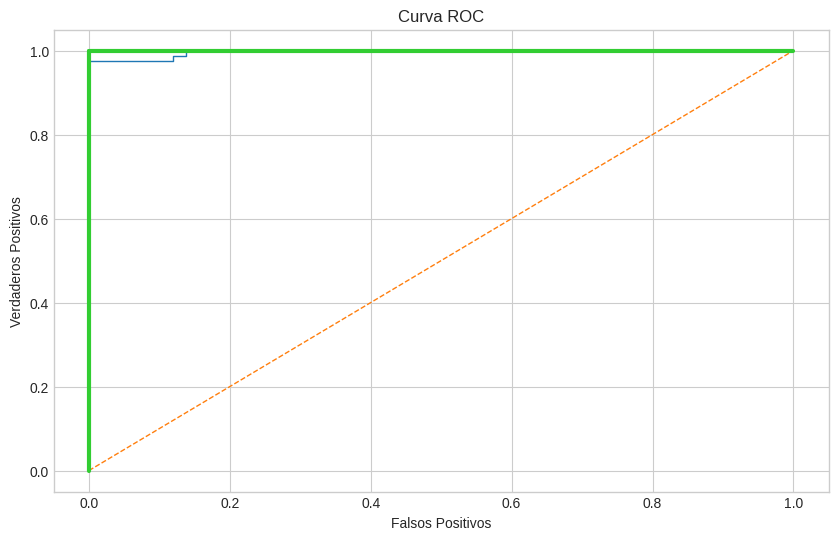

In [27]:
indicadores_ml(y_test, yhat, y_pred)

* El modelo muestra ser demasiado efectivo a la hora de predecir.
* esto nos puede jugar en contra al ser poco parsimonioso y no ser tan eficiente ante una muestra de datos nueva.

## Ejercicio (opcional): Depuración de atributos

* Reentrene el modelo en función de los atributos que presenten un coeficiente de
overlap menor a .45.
* Reporte el desempeño del modelo y comente sobre los nuevos hiper parámetros
estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [28]:
columnas_45 = data_overlap.loc[data_overlap['overlap']<.45].index.to_list()

In [29]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(df.loc[:,columnas_45],
                                    df['diagnosis'],random_state=1991, test_size=.33 )
scaler = StandardScaler().fit(X_train_pre)
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

In [30]:
# Crear gridsearch
get_params2 = GridSearchCV(SVC(kernel='rbf'), param, cv=10)
# Entrenar con matrices
get_params2.fit(X_train, y_train)
# imprimir hiperparametros y metrica
impr_best_param(get_params2)

Mejor parametro: {'C': 1000, 'gamma': 0.0001}
Mejor score (acuracy): 0.9632928475033739 


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.96      0.98        79

    accuracy                           0.98       188
   macro avg       0.99      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

Area bajo la curva: 0.997793519916386


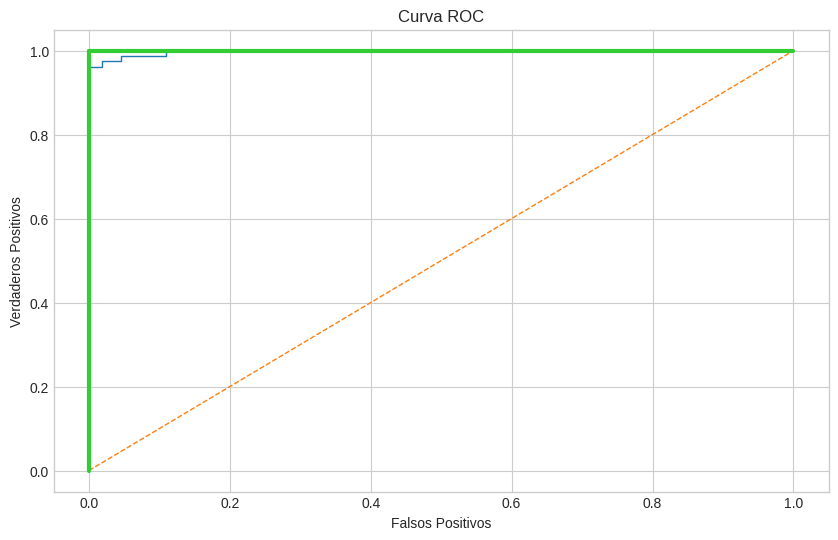

In [31]:
svc_2=SVC(C= 1000, gamma= 0.0001,kernel='rbf', probability=True)
svc_2.fit(X_train, y_train)
yhat2 = svc_2.predict(X_test)
y_pred2 = svc_2.predict_proba(X_test)
indicadores_ml(y_test, yhat2, y_pred2)

* El modelo muestra una leve mejora, es decir al quitar las variables que dificultan la separacion de nuestra muestra, el modelo logra encontrar mejores hiper parametros y ser mas eficiente con menos variables.